In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, convert_weekly_panel_to_biweekly_panel, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance, add_missing_indicators
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis_weekly.parquet"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_0_crimes_100m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_0_crimes_100m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)

analysis='group_1_crimes_100m'

In [2]:
# Convert weekly panel to biweekly panel.
df = convert_weekly_panel_to_biweekly_panel(df, analysis)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary  = get_value_variable_names(df, analysis)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                                                  
                                                 \emph{Independent Variable}                                      
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_1_crimes_100m        7.391280e-74   
                                                 pre_treatment_change_in_group_1_crimes_100m       5.904511e-01   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                3.610017e-03   
                                                 job_density_2013                                  2.203770e-06   
                                                 med_hhinc2016                                     1.707684e-19   
                                                 poor_share2010                                    1.368642e-48   
                                                 popdensity2010                                    2.207629e-01   
Panel C: Case Initiation                         for_cause                                         3.777882e-01   
                                                 no_cause                                          4.405707e-01   
                                                 non_payment                                       3.351107e-01   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                          7.565104e-01   
                                                 hasAttyP                                          1.790202e-02   
                                                 isEntityD                                         3.216615e-04   
                                                 isEntityP                                         1.037880e-04   

                                                                                                            
                                                                                                            
                                                 \emph{Independent Variable}                                
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_1_crimes_100m   4.285481e-02  
                                                 pre_treatment_change_in_group_1_crimes_100m  6.939757e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                           7.782860e-01  
                                                 job_density_2013                             5.178933e-01  
                                                 med_hhinc2016                                1.224981e-01  
                                                 poor_share2010                               5.297634e-01  
                                                 popdensity2010                               6.607443e-03  
Panel C: Case Initiation                         for_cause                                    1.764482e-08  
                                                 no_cause                                     8.995981e-01  
                                                 non_payment                                  4.059912e-07  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                     2.094824e-05  
                                                 hasAttyP                                     6.226457e-04  
                                                 isEntityD                                    1.265289e-02  
                                                 isEntityP                                    2.625077e-07

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                   Cases Won by Plaintiff   
Panel A total_twenty_seventeen_group_1_crimes_100m               6.056139   
Panel B frac_coll_plus2010                                       0.322882   
        job_density_2013                                     16069.137185   
        med_hhinc2016                                        48035.651626   
        poor_share2010                                           0.273292   
Panel D hasAttyP                                                 0.879853   
        isEntityD                                                0.014166   
        isEntityP                                                0.808499   

                                                   Difference in Cases Won by Defendant  \
                                                                             Unweighted   
Panel A total_twenty_seventeen_group_1_crimes_100m                             0.500006   
Panel B frac_coll_plus2010                                                     0.002115   
        job_density_2013                                                     926.908698   
        med_hhinc2016                                                       1312.556234   
        poor_share2010                                                        -0.003079   
Panel D hasAttyP                                                              -0.035786   
        isEntityD                                                             -0.011791   
        isEntityP                                                             -0.064959   

                                                                              \
                                                        \emph{p}    Weighted   
Panel A total_twenty_seventeen_group_1_crimes_100m  4.285481e-02   -0.039231   
Panel B frac_coll_plus2010                          7.782860e-01   -0.003270   
        job_density_2013                            5.178933e-01 -123.287970   
        med_hhinc2016                               1.224981e-01 -438.555741   
        poor_share2010                              5.297634e-01   -0.003001   
Panel D hasAttyP                                    6.226457e-04   -0.010905   
        isEntityD                                   1.265289e-02   -0.000714   
        isEntityP                                   2.625077e-07   -0.011561   

                                                              
                                                    \emph{p}  
Panel A total_twenty_seventeen_group_1_crimes_100m  0.866025  
Panel B frac_coll_plus2010                          0.663146  
        job_density_2013                            0.931381  
        med_hhinc2016                               0.586691  
        poor_share2010                              0.542526  
Panel D hasAttyP                                    0.261692  
        isEntityD                                   0.871267  
        isEntityP                                   0.213400

In [5]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable='file_week',
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name='file_week', freq='2W', base_period='varying')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 9648/9648 [02:09<00:00, 74.55it/s] 


KeyError: 'file_week_alias'

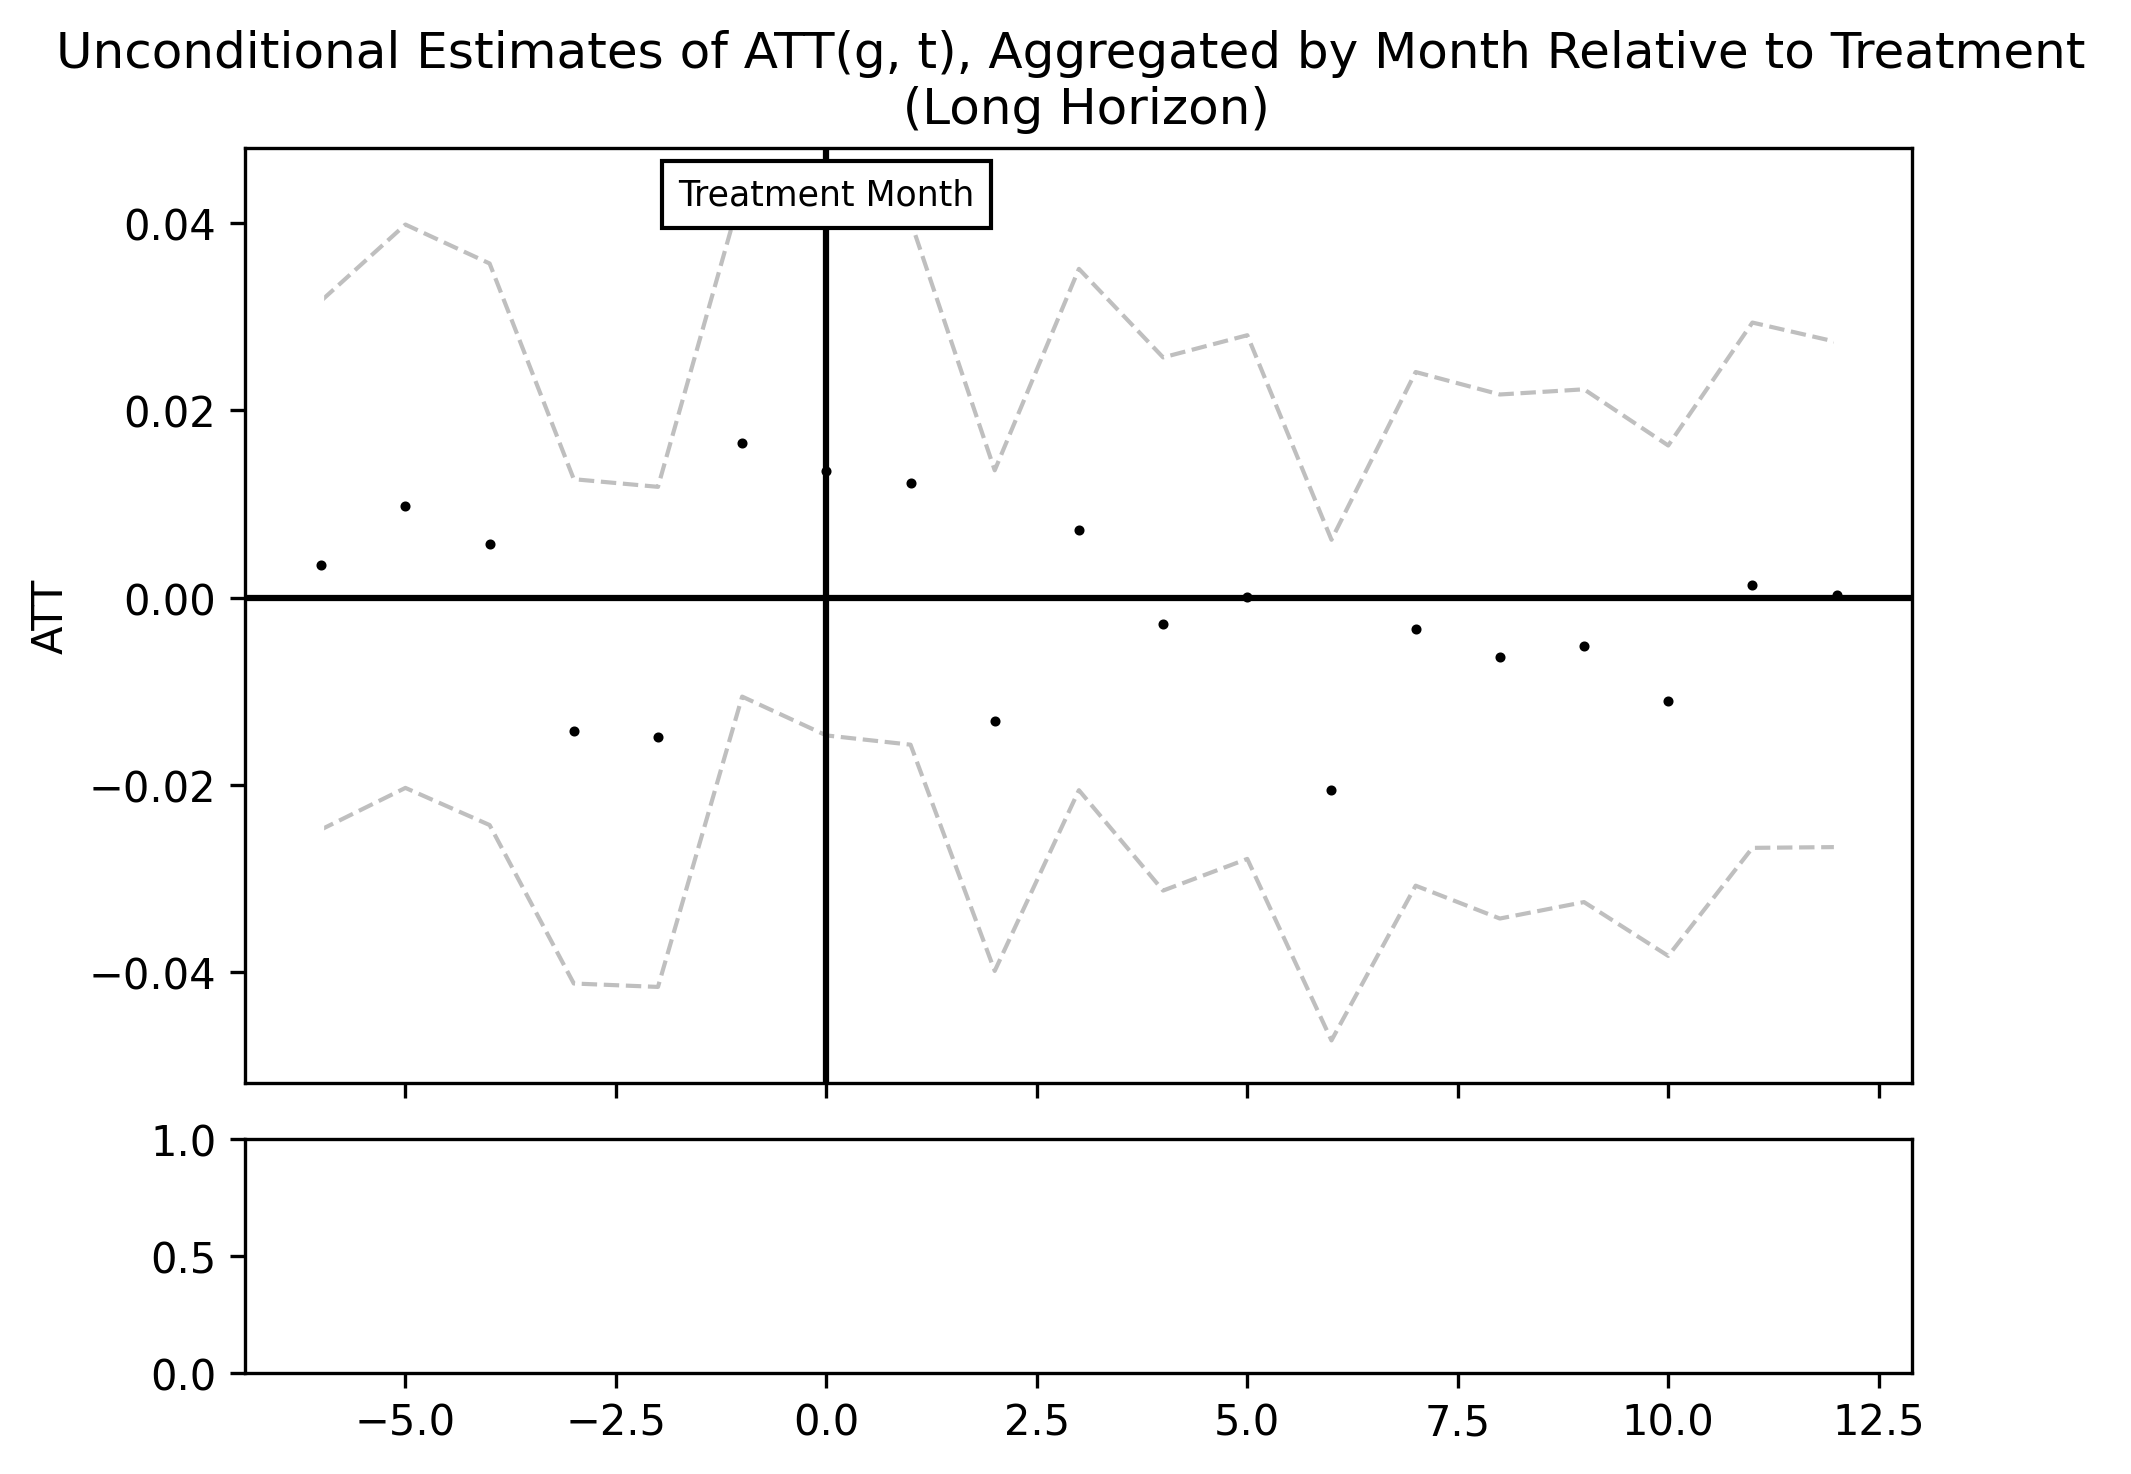

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-6, end_period=12,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable='file_week', df=df)

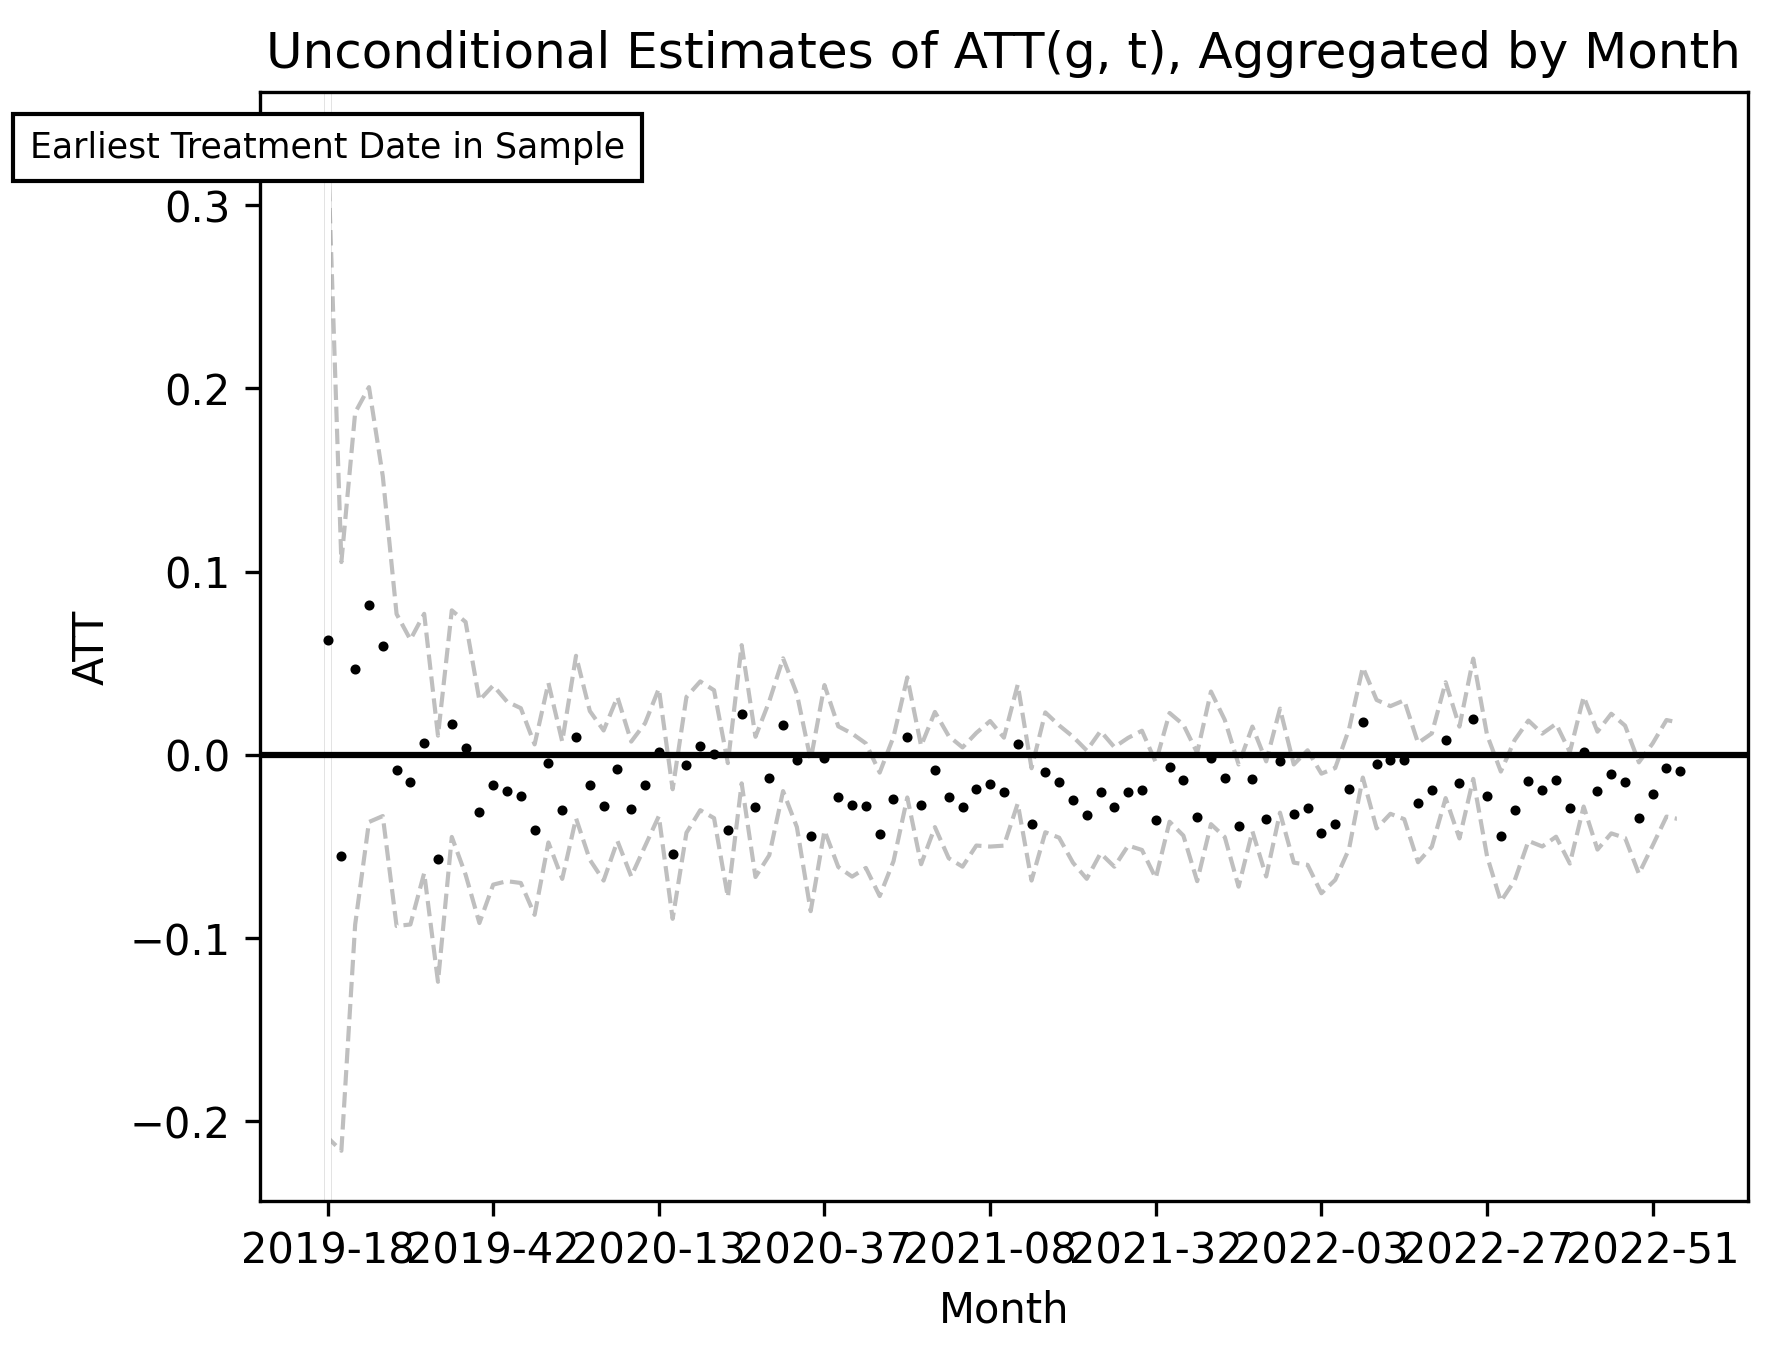

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [9]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name='file_week', freq='M', base_period='varying')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=10]   60%|████████████        | 5823/9648 [03:59<02:04, 30.65it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
Computing ATTgt [workers=10]   60%|████████████        | 5827/9648 [04:00<02:26, 26.15it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
Computing ATTgt [workers=10]   60%|████████████        | 5831/9648 [04:00<02:16, 28.06it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered

KeyError: 'file_week_alias'

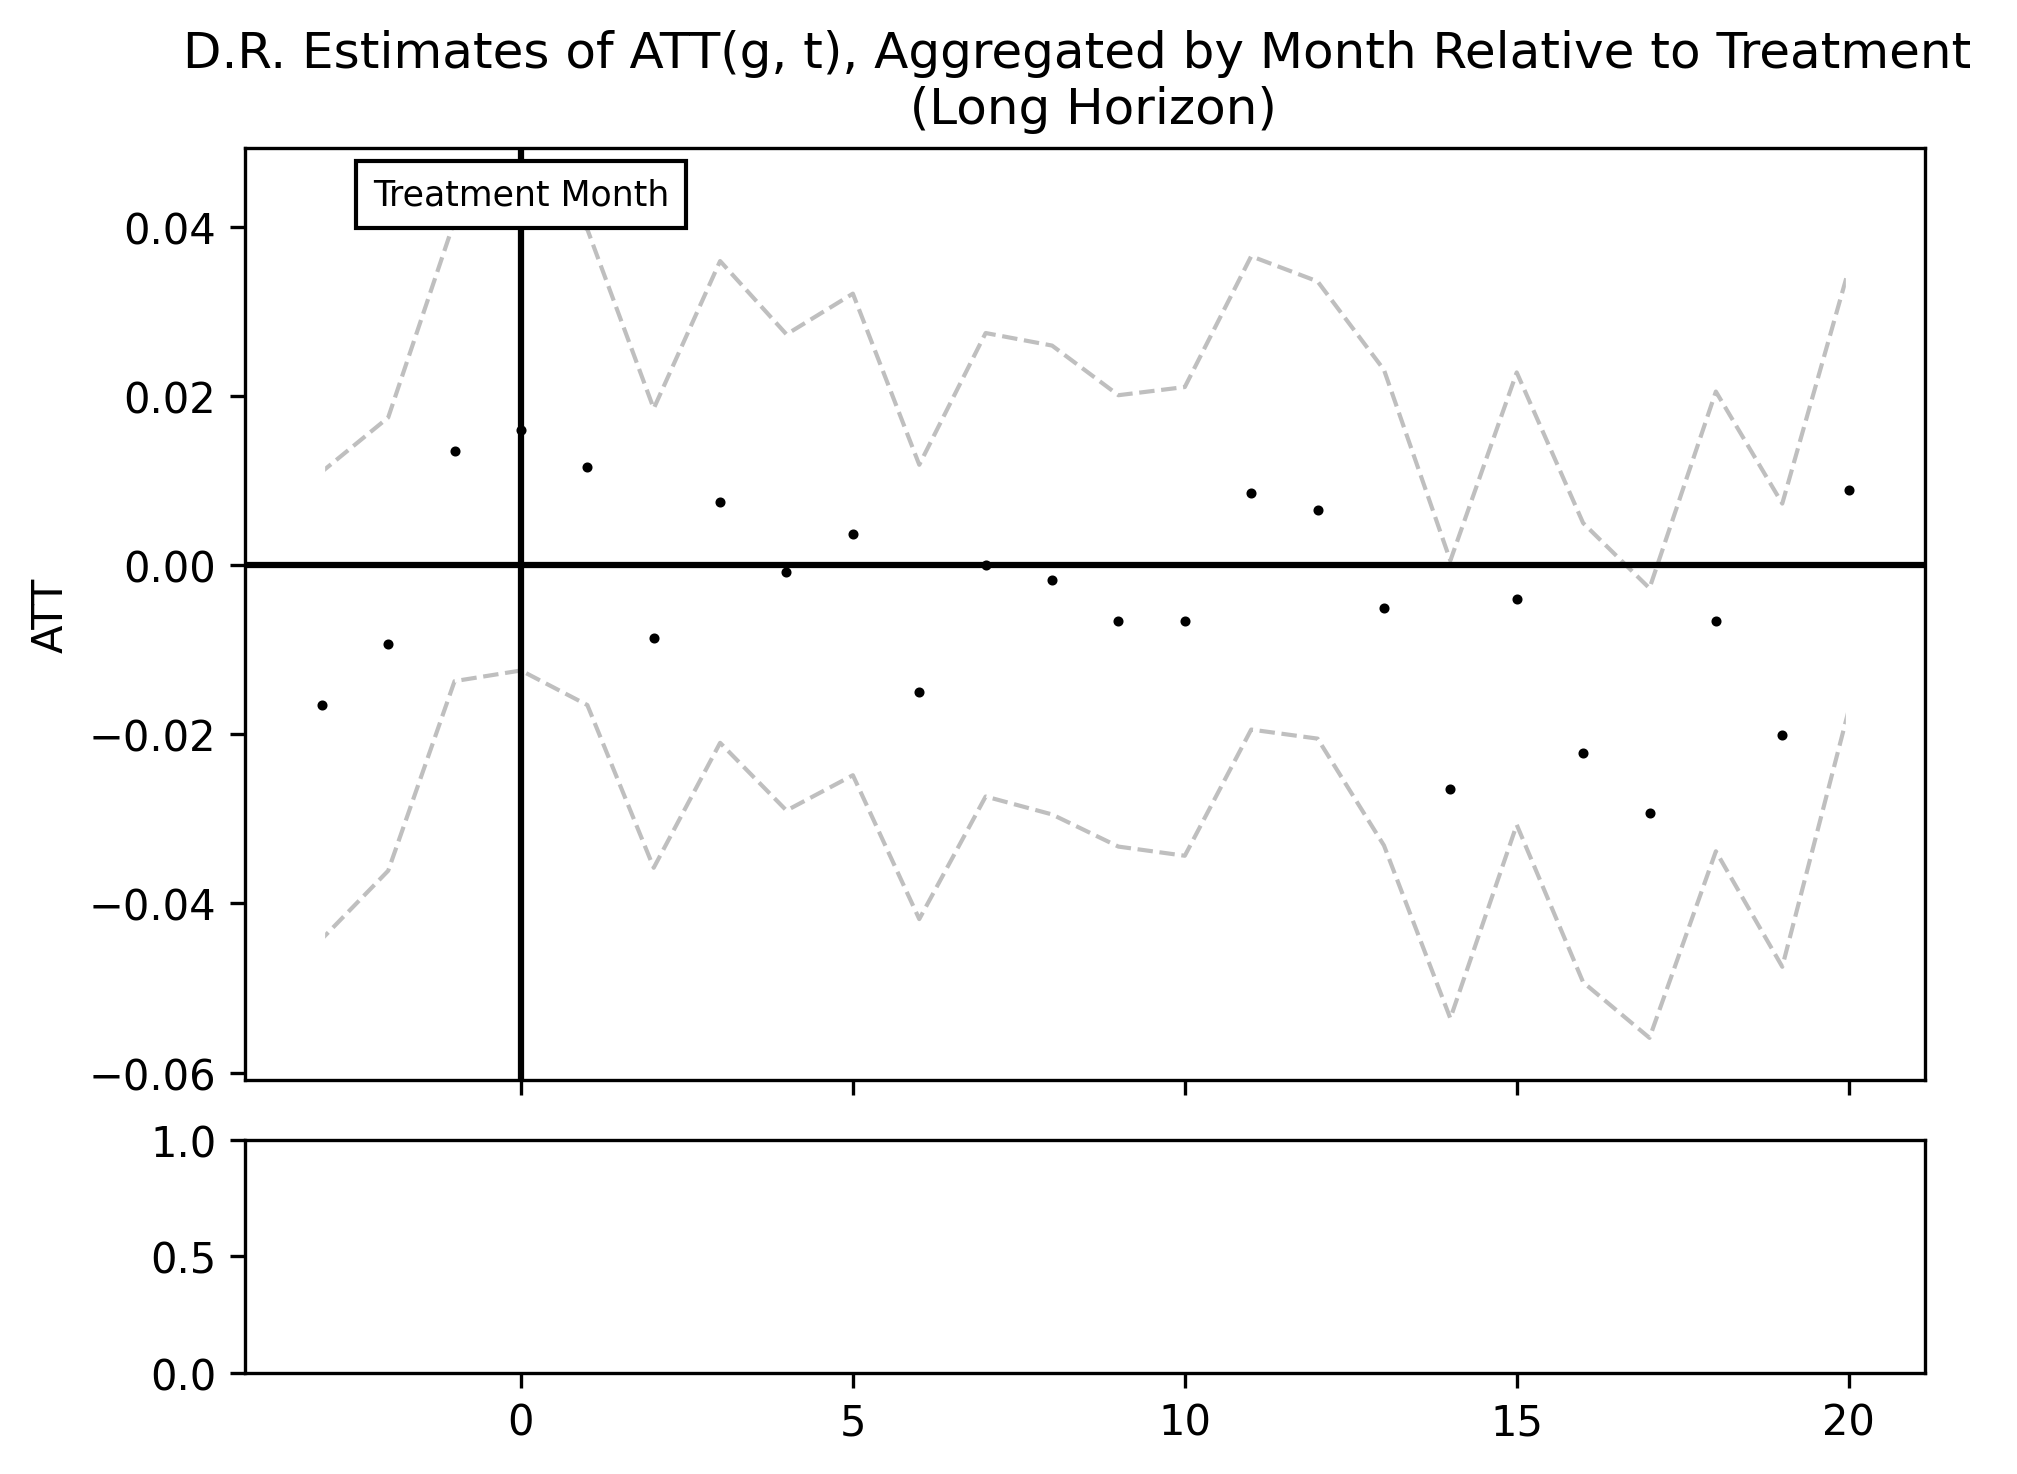

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-3,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable='file_week', df=df)

In [ ]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")